## Chapter 2 - Field

### 2.2 파이썬에서의 복소수

In [1]:
3j

3j

In [2]:
j

NameError: name 'j' is not defined

In [3]:
1j

1j

In [4]:
1+3j

(1+3j)

In [6]:
(1+3j) + (10+20j)

(11+23j)

In [7]:
x = 1 + 3j
(x-1)**2

(-9+0j)

In [8]:
1+2j*3

(1+6j)

In [9]:
4*3j**2

(-36+0j)

In [11]:
x.real

1.0

In [12]:
x.imag

3.0

In [13]:
type(1+2j)

complex

### 2.3 필드의 추상화

In [15]:
def solve1(a, b, c): return (c-b)/a

solve1(10, 5, 30)

2.5

In [16]:
solve1(10+5j, 5, 20)

(1.2-0.6j)

### 2.4 복소수 필드 C 다루기

In [18]:
S = [2+2j, 3+2j, 1.75+1j, 2+1j, 2.25+1j, 2.5+1j, 2.75+1j, 3+1j, 3.25+1j]

In [40]:
from plotting import plot
plot(S, 4)

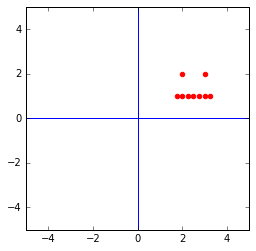

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plot(Z):
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0)
    plt.axvline(0)

    plt.scatter([x.real for x in Z], [x.imag for x in Z], color='red')
    
plot(S)


#### 2.4.1 복소수의 절대값

In [31]:
abs(3+4j)

5.0

In [32]:
abs(1+1j)

1.4142135623730951

In [33]:
(3+4j).conjugate()

(3-4j)

#### 2.4.2 복소수 덕셈하기(Translation)

##### Task 2.4.3

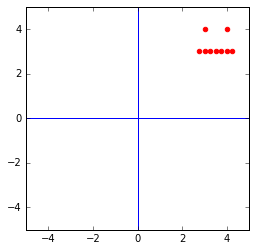

In [57]:
S_trans = {(1+2j) + z for z in S}
plot(S_trans)

#### 2.4.3 양의 실수로 복소수 곱하기(Scaling)

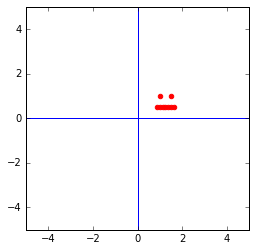

In [68]:
S_scale = {z / 2 for z in S}
plot(S_scale)


#### 2.4.4 음수로 복소수 곱하기 : 180 회전

###### Task 2.4.8

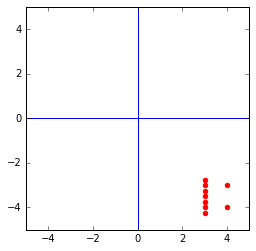

In [73]:
S_st = {(-1j)*z + (2-1j) for z in S}
plot(S_st)

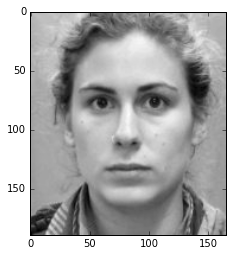

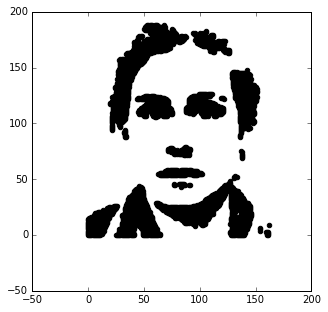

In [167]:
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread('img01.png')
plt.imshow(image, cmap = 'gray')
image = np.flipud(image)

h, w = image.shape

pts = {x+y*1j for y in range(h) for x in range(w) if image[y][x] < 120/255}
plt.figure(figsize = (5, 5))
plt.scatter([x.real for x in pts], [y.imag for y in pts], color = 'black')


##### Task 2.4.11

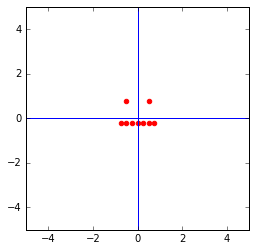

In [175]:
def trans_centroid(Z):
    centroid = sum(Z) / len(Z)
    return {z - centroid for z in Z}

plot(trans_centroid(S))

###### Task 2.4.12

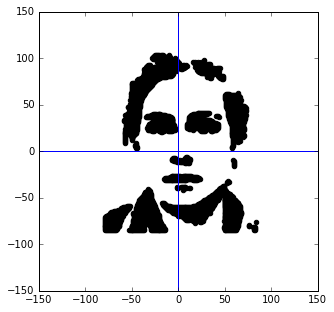

In [187]:
pts_cen = trans_centroid(pts)

# configure figure
plt.figure(figsize = (5, 5))
plt.xlim([-150, 150])
plt.ylim([-150, 150])
plt.axhline(0)
plt.axvline(0)

plt.scatter([x.real for x in pts_cen], [y.imag for y in pts_cen], color = 'black')

###  2.4.7 오일러 공식

##### Task 2.4.17

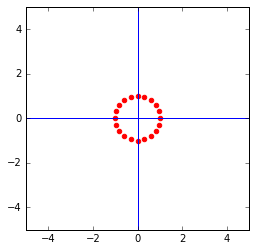

In [219]:
from math import e, pi

n = 20
w = e**(2*pi*1j/n)
Ws = [w**x for x in range(n)]
plot(Ws)

### 2.4.10 라디안 회전

##### Task 2.4.18

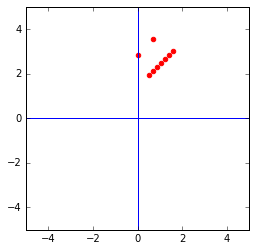

In [220]:
S_rot = [z * e**(pi/4*1j) for z in S]
plot(S_rot)

##### Task 2.4.19

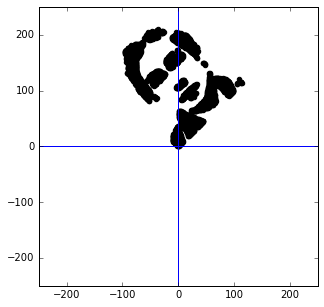

In [224]:
pts_rot = [z * e**(pi/4*1j) for z in pts]

# configure figure
plt.figure(figsize = (5, 5))
plt.xlim([-250, 250])
plt.ylim([-250, 250])
plt.axhline(0)
plt.axvline(0)

plt.scatter([x.real for x in pts_rot], [y.imag for y in pts_rot], color = 'black')

##### Task 2.4.20

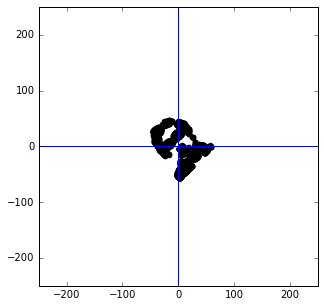

In [229]:
pts_trs = [z * e**(pi/4*1j) / 2  for z in trans_centroid(pts)]

# configure figure
plt.figure(figsize = (5, 5))
plt.xlim([-250, 250])
plt.ylim([-250, 250])
plt.axhline(0)
plt.axvline(0)

plt.scatter([x.real for x in pts_trs], [y.imag for y in pts_trs], color = 'black')

### 2.5 GF(2)에 대해 알아보기

In [3]:
from GF2 import one

one*one

one

In [4]:
one*0

0

In [5]:
one+0

one

In [6]:
one+one

0

In [7]:
-one

one

##### Problem 2.5.1

11-심볼 메시지를 다음과 같이 암호화하였다고 생각하자. 각 심볼은 0과 26사이의 숫자에 의해 표현된다(A$\rightarrow$0, B$\rightarrow$1, ..., Z$\rightarrow$25, space$\rightarrow$26). 각 숫자는 5-비트 이진 시퀀스(0$\rightarrow$00000, 1$\rightarrow$00001, ..., 26$\rightarrow$11010)에 의해 표현된다. 마지막, 55비트의 결과 시퀀스는 결함이 있는 일회성 패드를 사용하여 암호화 된다. 키는 55개의 랜덤 비트가 아니라 5개 랜덤 비트로 구성된 동일한 시퀀스를 11번 복사한 것이다. 암호문은 다음과 같다.

10101, 00100, 10101, 01011, 11001, 00011, 01011, 10101 , 00100, 11001, 11010

평문을 찾아보자.

In [97]:
def dec2bin(n):
    bin = ''
    len = 5;
    for idx in range(5):
        bin = str(n % 2) + bin
        n //= 2        
    return bin

def make_keylist(): return [dec2bin(n) for n in range(2**5)]

def xor_bin(bin1, bin2):
    rst = ''
    
    for idx in range(5):
        rst += '1' if bin1[idx] != bin2[idx] else '0'      
    return rst

def bin2alp(bin):
    dec = sum([int(bin[idx])*(2**(4 - idx)) for idx in range(5)])
    alp = chr(dec + 65) if dec <= 25 else ' ' if dec == 26  else '!'
    return alp

def cha2str(char_list):
    str_list = []
    str = ''
    for idx, char in enumerate(char_list):
        str += char
        if((idx+1) % 11 == 0):
            str_list.append(str)
            str = ''           
    return str_list
            

clist = ['10101', '00100', '10101', '01011', '11001', '00011', '01011',
     '10101', '00100', '11001', '11010']

keylist = make_keylist()
plist = [xor_bin(c, key) for key in keylist for c in clist]
alp_plist = [bin2alp(bin) for bin in plist]
cha2str(alp_plist)

#EVE IS EVIL

['VEVLZDLVEZ ',
 'UFUKYCKUFY!',
 'XGXJ!BJXG!Y',
 'WHWI AIWH Z',
 'RARP!HPRA!!',
 'QBQO!GOQB!!',
 'TCTN!FNTC!!',
 'SDSM!EMSD!!',
 '!M!DRLD!MRS',
 '!N!CQKC!NQT',
 '!O!BTJB!OTQ',
 '!P!ASIA!PSR',
 'ZIZHVPHZIVW',
 'YJYGUOGYJUX',
 '!K!FXNF!KXU',
 ' L EWME LWV',
 'FUF!JT!FUJK',
 'EVE IS EVIL',
 'HWHZLRZHWLI',
 'GXGYKQYGXKJ',
 'BQB!NX!BQNO',
 'ARA!MW!ARMP',
 'DSD!PV!DSPM',
 'CTC!OU!CTON',
 'N!NTB!TN!BC',
 'M!MSA SM!AD',
 'P!PRDZRP!DA',
 'O!OQCYQO!CB',
 'JYJXF!XJYFG',
 'IZIWE!WIZEH',
 'L LVH!VL HE',
 'K!KUG!UK!GF']

## 2.7 Problem

##### Problem 2.7.1

In [2]:
def my_filter(L, num): return [x for x in L if x%num != 0]

L = [1,2,4,5,7]
num = 2
my_filter(L, num)

[1, 5, 7]

##### Problem 2.7.2

In [5]:
def my_lists(L): return [[y+1 for y in range(x)] for x in L]

L = [1,2,3]
print(my_lists(L))

L = [0]
print(my_lists(L))

[[1], [1, 2], [1, 2, 3]]
[[]]


##### Problem 2.7.3

In [38]:
def my_function_composition(f, g): return {k:g[v] for (k, v) in f.items() if f[k] in g}

f = {0:'a', 1:'b'}
g = {'a':'apple', 'b':'banana'}

my_function_composition(f, g)

{0: 'apple', 1: 'banana'}

### 파이썬의 루프 문제

##### Problem 2.7.4

In [21]:
def mySum(L):
    current = 0
    for x in L:
        current += x
    return current

empty = []
list = [1,2,3,4,5,6,7,8,9,10]

print(mySum(list))
print(mySum(empty))

55
0


##### Proble 2.7.5

In [22]:
def myProduct(L):
    current = 1
    for x in L:
        current *= x
    return current

print(myProduct(list))
print(myProduct(empty))

3628800
1


##### Problem 2.7.6

In [24]:
from decimal import Decimal

def myMin(L):
    current = Decimal('inf')
    for x in L:
        current = x if x < current else current
    return current

print(myMin(list))
print(myMin(empty))

1
Infinity


##### Problem 2.7.7

In [29]:
def myConcat(L):
    current = ''
    for x in L:
        current += x
    return current

L = ['coding ', 'the ', 'matrix']

print(myConcat(L))
print(myConcat(empty))

coding the matrix



##### Problem 2.7.8

In [31]:
def myUnion(L):
    current = set()
    for x in L:
        current |= x
    return current

L = [{1, 2, 3}, {3, 4, 5}, {5, 6, 7}]

print(myUnion(L))
print(myUnion(empty))

{1, 2, 3, 4, 5, 6, 7}
set()


### 복소수 덧셈 연습

##### Problem 2.7.10

In [36]:
print((3+1j) + (2+ 2j))
print((-1+2j) + (1-1j))
print((2+0j) + (-3+0.001j))
print(4*(0+2j) + (0.001+1j))

(5+3j)
1j
(-1+0.001j)
(0.001+9j)


##### Problem 2.7.12

In [61]:
from math import e
from math import pi

import matplotlib.pyplot as plt
%matplotlib inline  

def plot(Z, color = 'red'):
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0)
    plt.axvline(0)

    plt.scatter([x.real for x in Z], [x.imag for x in Z], color = color)

In [47]:
def transform(a, b, L): return [a*z + b for z in L]

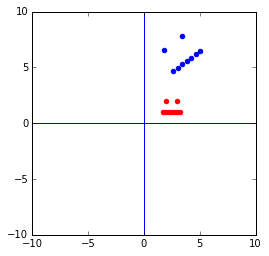

In [62]:
L = [2+2j, 3+2j, 1.75+1j, 2+1j, 2.25+1j, 2.5+1j, 2.75+1j, 3+1j, 3.25+1j]

#a
L_t = transform(2*e**(2/pi*1j), (1+1j), L)

#b
#실수보와 허수부를 각각 개별적으로 스케일링이 불가능

plot(L, color = 'red')
plot(L_t, color = 'blue')

### GF(2)

##### Problem 2.7.13

In [68]:
from GF2 import one

one+one+one+0

one

In [69]:
one*one + 0*one + 0*0 + one*one

0

In [70]:
(one+one+one)*(one+one+one+one)

0